In [9]:
import pandas as pd
import numpy as np

In [10]:
mush_data = pd.read_csv("dataset/mushrooms.csv")
mush_data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


### Steps for Cleaning
1. Remove columns with one unique values
2. Missing Data
3. Select Target Column
4. Data Encoding
5. Train-Test Split


### 1. Remove columns with one unique values

In [20]:

unique_data = mush_data.nunique().reset_index(name = "unique_count").set_index("index")
unique_data[unique_data["unique_count"] == 1].index

Index(['veil-type'], dtype='object', name='index')

In [21]:
unique_data = mush_data.nunique().reset_index(name = "unique_count").set_index("index")
mush_data = mush_data.drop(columns = unique_data[unique_data["unique_count"] == 1].index)
mush_data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,s,w,w,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,s,w,w,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,s,w,w,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,s,w,w,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,s,w,w,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,s,o,o,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,s,o,o,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,s,o,o,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,s,k,w,w,w,o,e,w,v,l


### 2. Missing Data

In [25]:

missing_values = [" ", "", None]
mush_data.replace(missing_values, np.nan, inplace=True)
mush_data.isna().sum()  # There is no missing data
# mush_data.isna().mean().sort_values(ascending=False) * 100

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

### 3. Select Target Column

In [26]:
X = mush_data.drop(columns=["class"])
y = mush_data["class"]

### 4. Data Encoding - One Hot Encoding

In [27]:
X = pd.get_dummies(X, drop_first=True)
X

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,False,False,False,False,True,False,True,False,False,False,...,False,True,False,False,False,False,False,False,True,False
1,False,False,False,False,True,False,True,False,False,False,...,True,False,False,False,True,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,True,False,False,False,False,False,True,False,False,False
3,False,False,False,False,True,False,False,True,False,False,...,False,True,False,False,False,False,False,False,True,False
4,False,False,False,False,True,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,False,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
8120,False,False,False,False,True,False,True,False,False,False,...,False,False,True,False,False,True,False,False,False,False
8121,False,True,False,False,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
8122,False,False,True,False,False,False,False,True,False,False,...,False,False,True,False,False,True,False,False,False,False


### 5. Train-Test Split

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

# Modelling - Classification Problem

In [42]:
# Logistic Regression - regression for classification problems
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

log_reg = LogisticRegression().fit(X_train, y_train)
log_reg_predict = log_reg.predict(X_test)
accuracy = accuracy_score(y_test, log_reg_predict)
accuracy

0.9985228951255539

In [43]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf_clf = RandomForestClassifier().fit(X_train, y_train)
rf_clf_predict = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, rf_clf_predict)
accuracy

1.0

In [44]:
# LIGHTGBM Classifier
import lightgbm as lgb

lgb_clf = lgb.LGBMClassifier().fit(X_train, y_train)
lgb_clf_predict = lgb_clf.predict(X_test)

accuracy = accuracy_score(y_test, lgb_clf_predict)
accuracy

[LightGBM] [Info] Number of positive: 2954, number of negative: 3139
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000346 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 172
[LightGBM] [Info] Number of data points in the train set: 6093, number of used features: 86
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.484819 -> initscore=-0.060744
[LightGBM] [Info] Start training from score -0.060744
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

1.0

## Model Evaluation - Confusion Matrix

<Axes: >

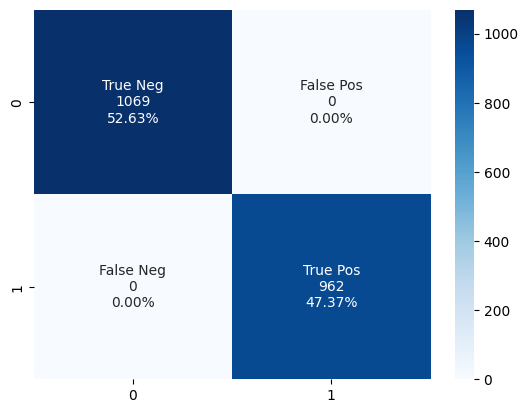

In [34]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

def confusion_matrix_plotter(predictions, actuals):
    cf_matrix = confusion_matrix(predictions, actuals)
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                    cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                        cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
            zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    return sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues')

confusion_matrix_plotter(predictions=rf_clf_predict, actuals=y_test)


### Model Evaluation - Area Under Curve (AUC) - ROC (Receiver Operating Characteristic) Curve

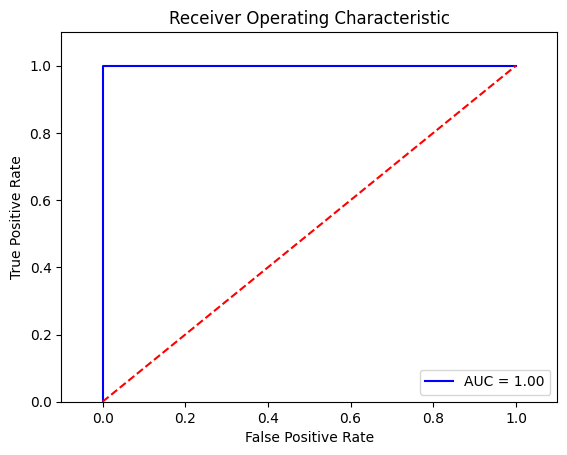

In [36]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = rf_clf.predict_proba(X_test)
preds = probs[:,1]
y_test = y_test.map({'e':1, 'p':0})
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(tpr, fpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(tpr, fpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.1, 1.1])
plt.ylim([0.0, 1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Model Evaluation - F1 Score

In [56]:
print(type(y_test))
print(type(rf_clf_predict))

<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>


In [59]:
y_test2 = y_test.reset_index(drop=True)
y_test2

0       e
1       e
2       e
3       p
4       e
       ..
2026    p
2027    p
2028    e
2029    e
2030    p
Name: class, Length: 2031, dtype: object

In [57]:
y_test

186     e
2883    e
5769    e
4363    p
2889    e
       ..
6212    p
6266    p
3706    e
4076    e
8016    p
Name: class, Length: 2031, dtype: object

In [53]:
rf_clf_predict_series = pd.Series(rf_clf_predict)
rf_clf_predict_series

0       e
1       e
2       e
3       p
4       e
       ..
2026    p
2027    p
2028    e
2029    e
2030    p
Length: 2031, dtype: object

In [70]:
from sklearn.metrics import f1_score
f1 = f1_score(y_true = y_test, y_pred=rf_clf_predict,  average='weighted')
f1

1.0